In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from math import fabs
from random import randint

2024-10-29 18:41:36.167742: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-29 18:41:36.169912: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-29 18:41:36.195641: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-29 18:41:36.195667: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-29 18:41:36.196479: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [2]:
# Definindo algumas constantes
saidas = ['DOMPRECDOMEXP', 'DOMPRECRESEXP', 'ADENSEXCDOMEXP', 'ADENSEXCRESEXP',	'ONUSEXCDOMEXP', 'ONUSEXCRESEXP', 'COABFAMDOMEXP', 'COABFAMRESEXP']
saidasDomicilios = ['DOMPRECDOMEXP', 'ADENSEXCDOMEXP', 'ONUSEXCDOMEXP', 'COABFAMDOMEXP']
saidasDesidentes = ['DOMPRECRESEXP', 'ADENSEXCRESEXP', 'ONUSEXCRESEXP', 'COABFAMRESEXP']
domiciliosPrecarios = ['DOMPRECDOMEXP']
adensamentoExcessivo = ['ADENSEXCDOMEXP']
onusExcessivo = ['ONUSEXCDOMEXP']
coabtaçãoFamiliar = ['COABFAMDOMEXP']

In [3]:
# Importa os dados
deficit_data_y = pd.read_excel('Banco_903_Amostras_Completo.xlsx')[saidasDomicilios]
deficit_data_x = pd.read_excel('Dimensoes_PCA_903_Amostras.xlsx')

# Concatena os dois blocos horizontalmente
deficit_data = pd.concat([deficit_data_x, deficit_data_y], axis=1)

# Exibe o banco de dados
deficit_data

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,DOMPRECDOMEXP,ADENSEXCDOMEXP,ONUSEXCDOMEXP,COABFAMDOMEXP
0,-4.255267,1.636565,-0.734032,0.249567,-0.490873,9.55,0.00,308.77,90
1,-0.902284,-0.905511,-0.164092,-0.336964,-0.130283,11.43,126.68,333.07,686
2,-3.514829,-0.457965,0.832445,-0.888344,0.783307,78.55,39.05,111.92,235
3,0.383952,0.202920,-0.351442,0.387851,0.348902,20.22,138.96,496.56,484
4,-1.425747,0.337700,-0.249719,0.413795,0.236795,8.57,120.49,373.83,337
...,...,...,...,...,...,...,...,...,...
898,-2.160979,-0.774764,2.681624,-1.242698,-0.451944,22.77,88.48,52.31,480
899,3.486756,1.296490,0.961841,-1.467687,1.530743,19.36,64.34,313.49,881
900,-3.217481,0.661316,-0.593865,0.031387,0.020535,0.00,76.27,157.44,389
901,-1.105044,0.994186,-0.674440,-0.233511,-0.088889,47.05,21.22,390.45,670


In [4]:
# Embaralha a ordem das amostras e divide em blocos de treino (80%) e teste (20%)
train, test = train_test_split(deficit_data, test_size=0.2, random_state=randint(0, 100))

train_x = train.drop(columns=saidasDomicilios)
validation_x = test.drop(columns=saidasDomicilios)
train_y = train[saidasDomicilios]
validation_y = test[saidasDomicilios]

numLines = int(validation_x.shape[0] * 0.25) #Equivalente a aproximadamente 5% do banco de dados

# Separa uma parte do bloco de validação para teste
validation_x, test_x = validation_x[:numLines], validation_x[numLines:]
validation_y, test_y = validation_y[:numLines], validation_y[numLines:]

In [5]:
# Inicializa a rede neural
neuralNetwork = Sequential()
neuralNetwork.add(Dense(units = 24, activation = 'relu', input_dim = validation_x.shape[1]))
neuralNetwork.add(Dense(units = train_y.shape[1], activation = 'linear'))
neuralNetwork.compile(loss = 'huber', optimizer = 'rmsprop', metrics = ['mae'])

2024-10-29 18:41:37.802452: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-29 18:41:37.802899: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [6]:
# Inicia o treinamento da rede
redes_treinadas = neuralNetwork.fit(train_x, train_y, epochs = 400, batch_size = 32, validation_data = (validation_x, validation_y))

Epoch 1/400
23/23 [==============================] - 0s 5ms/step - loss: 311.4898 - mae: 311.9779 - val_loss: 336.8333 - val_mae: 337.3281
Epoch 2/400
23/23 [==============================] - 0s 1ms/step - loss: 311.1382 - mae: 311.6281 - val_loss: 336.5148 - val_mae: 337.0081
Epoch 3/400
23/23 [==============================] - 0s 1ms/step - loss: 310.8077 - mae: 311.3004 - val_loss: 336.1866 - val_mae: 336.6781
Epoch 4/400
23/23 [==============================] - 0s 1ms/step - loss: 310.4701 - mae: 310.9644 - val_loss: 335.8476 - val_mae: 336.3399
Epoch 5/400
23/23 [==============================] - 0s 1ms/step - loss: 310.1224 - mae: 310.6194 - val_loss: 335.4962 - val_mae: 335.9926
Epoch 6/400
23/23 [==============================] - 0s 1ms/step - loss: 309.7558 - mae: 310.2548 - val_loss: 335.1214 - val_mae: 335.6203
Epoch 7/400
23/23 [==============================] - 0s 1ms/step - loss: 309.3671 - mae: 309.8666 - val_loss: 334.7211 - val_mae: 335.2208
Epoch 8/400
23/23 [========

108.65160369873047


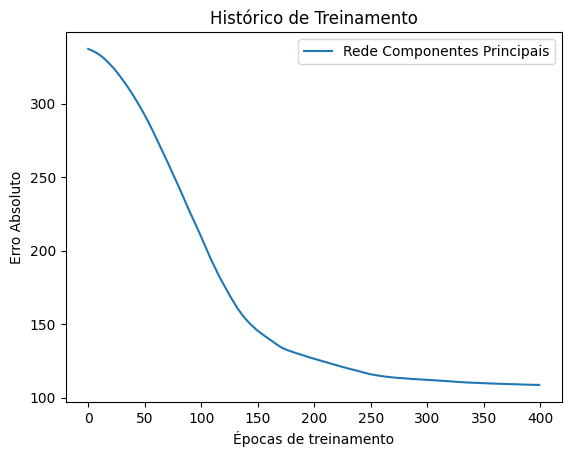

In [7]:
# Imprime o menor erro absoluto médio encontrado
print(min(neuralNetwork.history.history['val_mae']))

# Plota o gráfico de convegência do treinamento
plt.plot(neuralNetwork.history.history['val_mae'])
plt.title('Histórico de Treinamento')
plt.ylabel('Erro Absoluto')
plt.xlabel('Épocas de treinamento')
plt.legend(['Rede Componentes Principais'])
plt.show()

In [8]:
# Insere os valores de teste na rede e coleta os resultados gerados pela rede
predicts = neuralNetwork.predict(test_x)

5/5 [==============================] - 0s 884us/step


In [9]:
errorPercentage = []

# Calculo do tamanho do erro
for i in range(test_y.shape[0]):
    errorPercentage.append([])

    for j in range(test_y.shape[1]):
        erro = fabs(predicts[i][j] - test_y.iloc[i,j]) # Calcula o módulo da diferença entre o valor real e o gerado pela rede

        if test_y.iloc[i,j] != 0: # Verifica se o valor real é diferente de zero para evitar divisão por zero
            errorPercentage[i].append((erro / test_y.iloc[i,j])*100) # Calcula a porcentagem do tamanho do erro em relaçao ao valor real

        else:
            errorPercentage[i].append(None)  # Substitui a porcentagem com um valor nulo para ser descartado

# Exibe o resultado
for i in errorPercentage:
    print(i)

[12.246369026802682, 18.455534951324307, 3.777939589707168, 5.578123791383045]
[1.013952813900522, None, 174.89212835842852, 181.71215318653682]
[None, 35.332103414655776, 56.57989397354719, 17.84115687073001]
[437.4779652074441, 459.35480773105735, 750.6486286488614, 85.4899169921875]
[41.509485094329165, 11.525522838284422, 8.128592590567688, 9.866504279934631]
[78.61497281379266, 70.79862095458701, 21.009763607308884, 29.35626942624328]
[4.341339901577666, 6.530352616968692, 6.263867804949469, 33.332147813381106]
[75.73453198096618, 264.0148043943174, 45.161612795097234, 4.123122542774703]
[None, 22.853414153492974, 15.951287591930678, 33.39577326698909]
[None, 349.28863073475264, 84.10506026274284, 4.495875040690104]
[0.3898792255552901, 500.47046889921336, 22.353004242922953, 2.3785581683168315]
[10.033462643532113, 11.852434796855697, 20.762421864108596, 10.235968975981406]
[25.1939457677559, 88.29700943931881, 78.73600295666205, 0.2591024521221532]
[28.383879228071734, 118.45916

In [10]:
meanErrorPercentage = []

# Calcula a média das porcentagens excluindo os valores nulos
for i in range(test_y.shape[1]):
    sum = 0
    counter = test_y.shape[0]

    for j in range(test_y.shape[0]):
        if errorPercentage[j][i] == None:
            counter -= 1

        else:
            sum += errorPercentage[j][i]

    meanErrorPercentage.append(sum/counter)

print("Média do Erro em Porcetagem")
for i in range(len(meanErrorPercentage)):
    print("{}: {:.2f}%".format(saidasDomicilios[i], meanErrorPercentage[i]))

Média do Erro em Porcetagem
DOMPRECDOMEXP: 63.23%
ADENSEXCDOMEXP: 70.11%
ONUSEXCDOMEXP: 56.30%
COABFAMDOMEXP: 21.05%
